# Visualization & Figure Creation

Steve Purves [](https://orcid.org/0000-0002-0760-5497)

## Main Timeline Figure

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
def make_category_columns(df):
    df['Depth'] = 'Shallow (<18km)'
    df.loc[(df['Depth(km)'] >= 18) & (df['Depth(km)'] <= 28), 'Depth'] = 'Interchange (18km>x>28km)'
    df.loc[df['Depth(km)'] >= 28, 'Depth'] = 'Deep (>28km)'
    
    df['Mag'] = 0
    df.loc[(df['Magnitude'] >= 1) & (df['Magnitude'] <= 2), 'Mag'] = 1
    df.loc[(df['Magnitude'] >= 2) & (df['Magnitude'] <= 3), 'Mag'] = 2
    df.loc[(df['Magnitude'] >= 3) & (df['Magnitude'] <= 4), 'Mag'] = 3
    df.loc[(df['Magnitude'] >= 4) & (df['Magnitude'] <= 5), 'Mag'] = 4    
    
    return df

## Visualising Long term earthquake data

Data taken directly from the IGN Catalog and processed using the [data screening notebook](data-screening.ipynb).

In [3]:
df_ign = pd.read_csv('../data/lapalma_ign.csv')
df_ign = make_category_columns(df_ign)
df_ign.head()

In [4]:
df_ign['DateTime'] = pd.to_datetime(df_ign['Date'] + ' ' + df_ign['Time'])
df_ign['DateTime']

0       2017-03-09 23:44:06
1       2017-03-10 00:16:10
2       2017-03-10 00:16:11
3       2017-03-10 03:20:26
4       2017-08-21 02:06:55
                ...        
11342   2022-09-14 00:20:51
11343   2022-09-14 01:40:30
11344   2022-09-14 01:44:52
11345   2022-09-14 02:03:08
11346   2022-09-14 03:58:59
Name: DateTime, Length: 11347, dtype: datetime64[ns]

In [5]:
df_ign_early = df_ign[df_ign['DateTime'] < '2021-09-11']
df_ign_pre = df_ign[(df_ign['DateTime'] >= '2021-09-11')&(df_ign['DateTime'] < '2021-09-19 14:13:00')]
df_ign_phase1 = df_ign[(df_ign['DateTime'] >= '2021-09-19 14:13:00')&(df_ign['DateTime'] < '2021-10-01')]
df_ign_phase2 = df_ign[(df_ign['DateTime'] >= '2021-10-01')&(df_ign['DateTime'] < '2021-12-01')]
df_ign_phase3 = df_ign[(df_ign['DateTime'] >= '2021-12-01')&(df_ign['DateTime'] <= '2021-12-31')]

df_erupt = df_ign[(df_ign['Date'] < '2022-01-01') & (df_ign['Date'] > '2021-09-11')]

df_erupt_1 = df_erupt[df_erupt['Magnitude'] < 1.0]
df_erupt_2 = df_erupt[(df_erupt['Magnitude'] >= 1.0)&(df_erupt['Magnitude'] < 2.0)]
df_erupt_3 = df_erupt[(df_erupt['Magnitude'] >= 2.0)&(df_erupt['Magnitude'] < 3.0)]
df_erupt_4 = df_erupt[(df_erupt['Magnitude'] >= 3.0)&(df_erupt['Magnitude'] < 4.0)]
df_erupt_5 = df_erupt[df_erupt['Magnitude'] > 4.0]

In [6]:
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['ytick.labelleft'] = True
matplotlib.rcParams['ytick.labelright'] = True

fig = matplotlib.pyplot.figure(figsize=(24,12), dpi=300)
fig.tight_layout()
# Creating axis
# add_axes([xmin,ymin,dx,dy])
ax_min = fig.add_axes([0.01, 0.01, 0.01, 0.01])
ax_min.axis('off')
ax_max = fig.add_axes([0.99, 0.99, 0.01, 0.01])
ax_max.axis('off')

ax_timeline = fig.add_axes([0.04, 0.1, 0.92, 0.85])
ax_timeline.spines["top"].set_visible(False)
ax_timeline.spines["right"].set_visible(False)
ax_timeline.spines["left"].set_visible(False)
ax_timeline.grid(axis='x')


ax_timeline.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.075, ymax=0.98, color='r', linewidth=3)


def make_scatter(df, c, alpha=0.8):
    M = 3*np.exp2(1.3*df['Magnitude'])
    return ax_timeline.scatter(df['DateTime'], df['Depth(km)'], s=M, c=c, alpha=alpha, edgecolor='black', linewidth=0.5, zorder=2);

points_1 = make_scatter(df_erupt_1, c=[(0.890, 0.466, 0.760)], alpha=0.3)
points_2 = make_scatter(df_erupt_2, c=[(0.737, 0.741, 0.133)], alpha=0.4)
points_3 = make_scatter(df_erupt_3, c=[(0.172, 0.627, 0.172)], alpha=0.5)
points_4 = make_scatter(df_erupt_4, c=[(1.000, 0.498, 0.054)], alpha=0.6)
points_5 = make_scatter(df_erupt_5, c=[(0.839, 0.152, 0.156)], alpha=0.8)

ax_timeline.tick_params(axis='x', labelrotation=0, bottom=True)
ax_timeline.set_ylabel('')
ax_timeline.yaxis.set_ticks_position('both')
ax_timeline.yaxis.set_ticks_position('both')

xticks = ax_timeline.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)

ax_timeline.invert_yaxis()
ax_timeline.spines['bottom'].set_position(('data', 45))
ax_timeline.margins(tight=True, x=0)
ax_timeline.legend(
    [points_1, points_2, points_3, points_4, points_5],
    ['0 < M <= 1','1 < M <= 2','2 < M <= 3','3 < M <= 4','M > 4'],
    loc='lower left', bbox_to_anchor=(0.01, 0.1, 0.15, 0.1), fancybox=True,
    borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)",
    fontsize=14, title_fontsize=14, framealpha=1)

ax_timeline.set_ylim(ax_timeline.get_ylim()[0], -9)

plt.annotate('ERUPTION', (0.055, 0.42), rotation=90, xycoords='axes fraction', fontweight='bold', fontsize=20, color='r')
plt.annotate('Pre\nEruptive\nSwarm', (0.035, 0.88), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='b', horizontalalignment='center')
plt.annotate('Early Eruptive\nPhase', (0.12, 0.9), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='orange', horizontalalignment='center')
plt.annotate('Main Eruptive Phase\n(sustained gas and lava ejection)', (0.45, 0.9), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='green', horizontalalignment='center')
plt.annotate('Final Eruptive Phase\n(reducing gas and lava ejection)', (0.86, 0.9), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='r', horizontalalignment='center')

ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -8), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 53, color=(0.121, 0.466, 0.705), zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -8), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 53, color=(1.000, 0.498, 0.055), zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -8), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 53, color=(0.173, 0.627, 0.172), zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -8), date2num(pd.to_datetime('2021-12-31'))-date2num(pd.to_datetime('2021-12-01'))+1, 53, color=(0.839, 0.152, 0.156), zorder=1, alpha=0.1));

ax_timeline.set_title("Recorded seismicity during the La Palma eruption 11 September - 15 December 2021 (INVOLCAN Dataset)", dict(fontsize=24), pad=20)
ax_timeline.set_ylabel("Depth (km)", dict(fontsize=20), labelpad=20)
ax_timeline.set_xlabel("Eruption Timeline", dict(fontsize=20), labelpad=20);

## Cumulative Distrubtion Plots

In [7]:
def cumulative_events_mag_depth(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None, kde=True):
    matplotlib.rcParams['ytick.labelright'] = False
    g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, height=10, space=0.1, marginal_ticks=False, ratio=8, alpha=0.6,
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)', 'Deep (>28km)'],
                      ax=ax, palette=palette, ylim=(-2,50), xlim=(0.3,5.6), edgecolor=".2", marginal_kws=dict(bins=20))
    if kde:
        g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();
    g.fig.set_dpi(dpi)

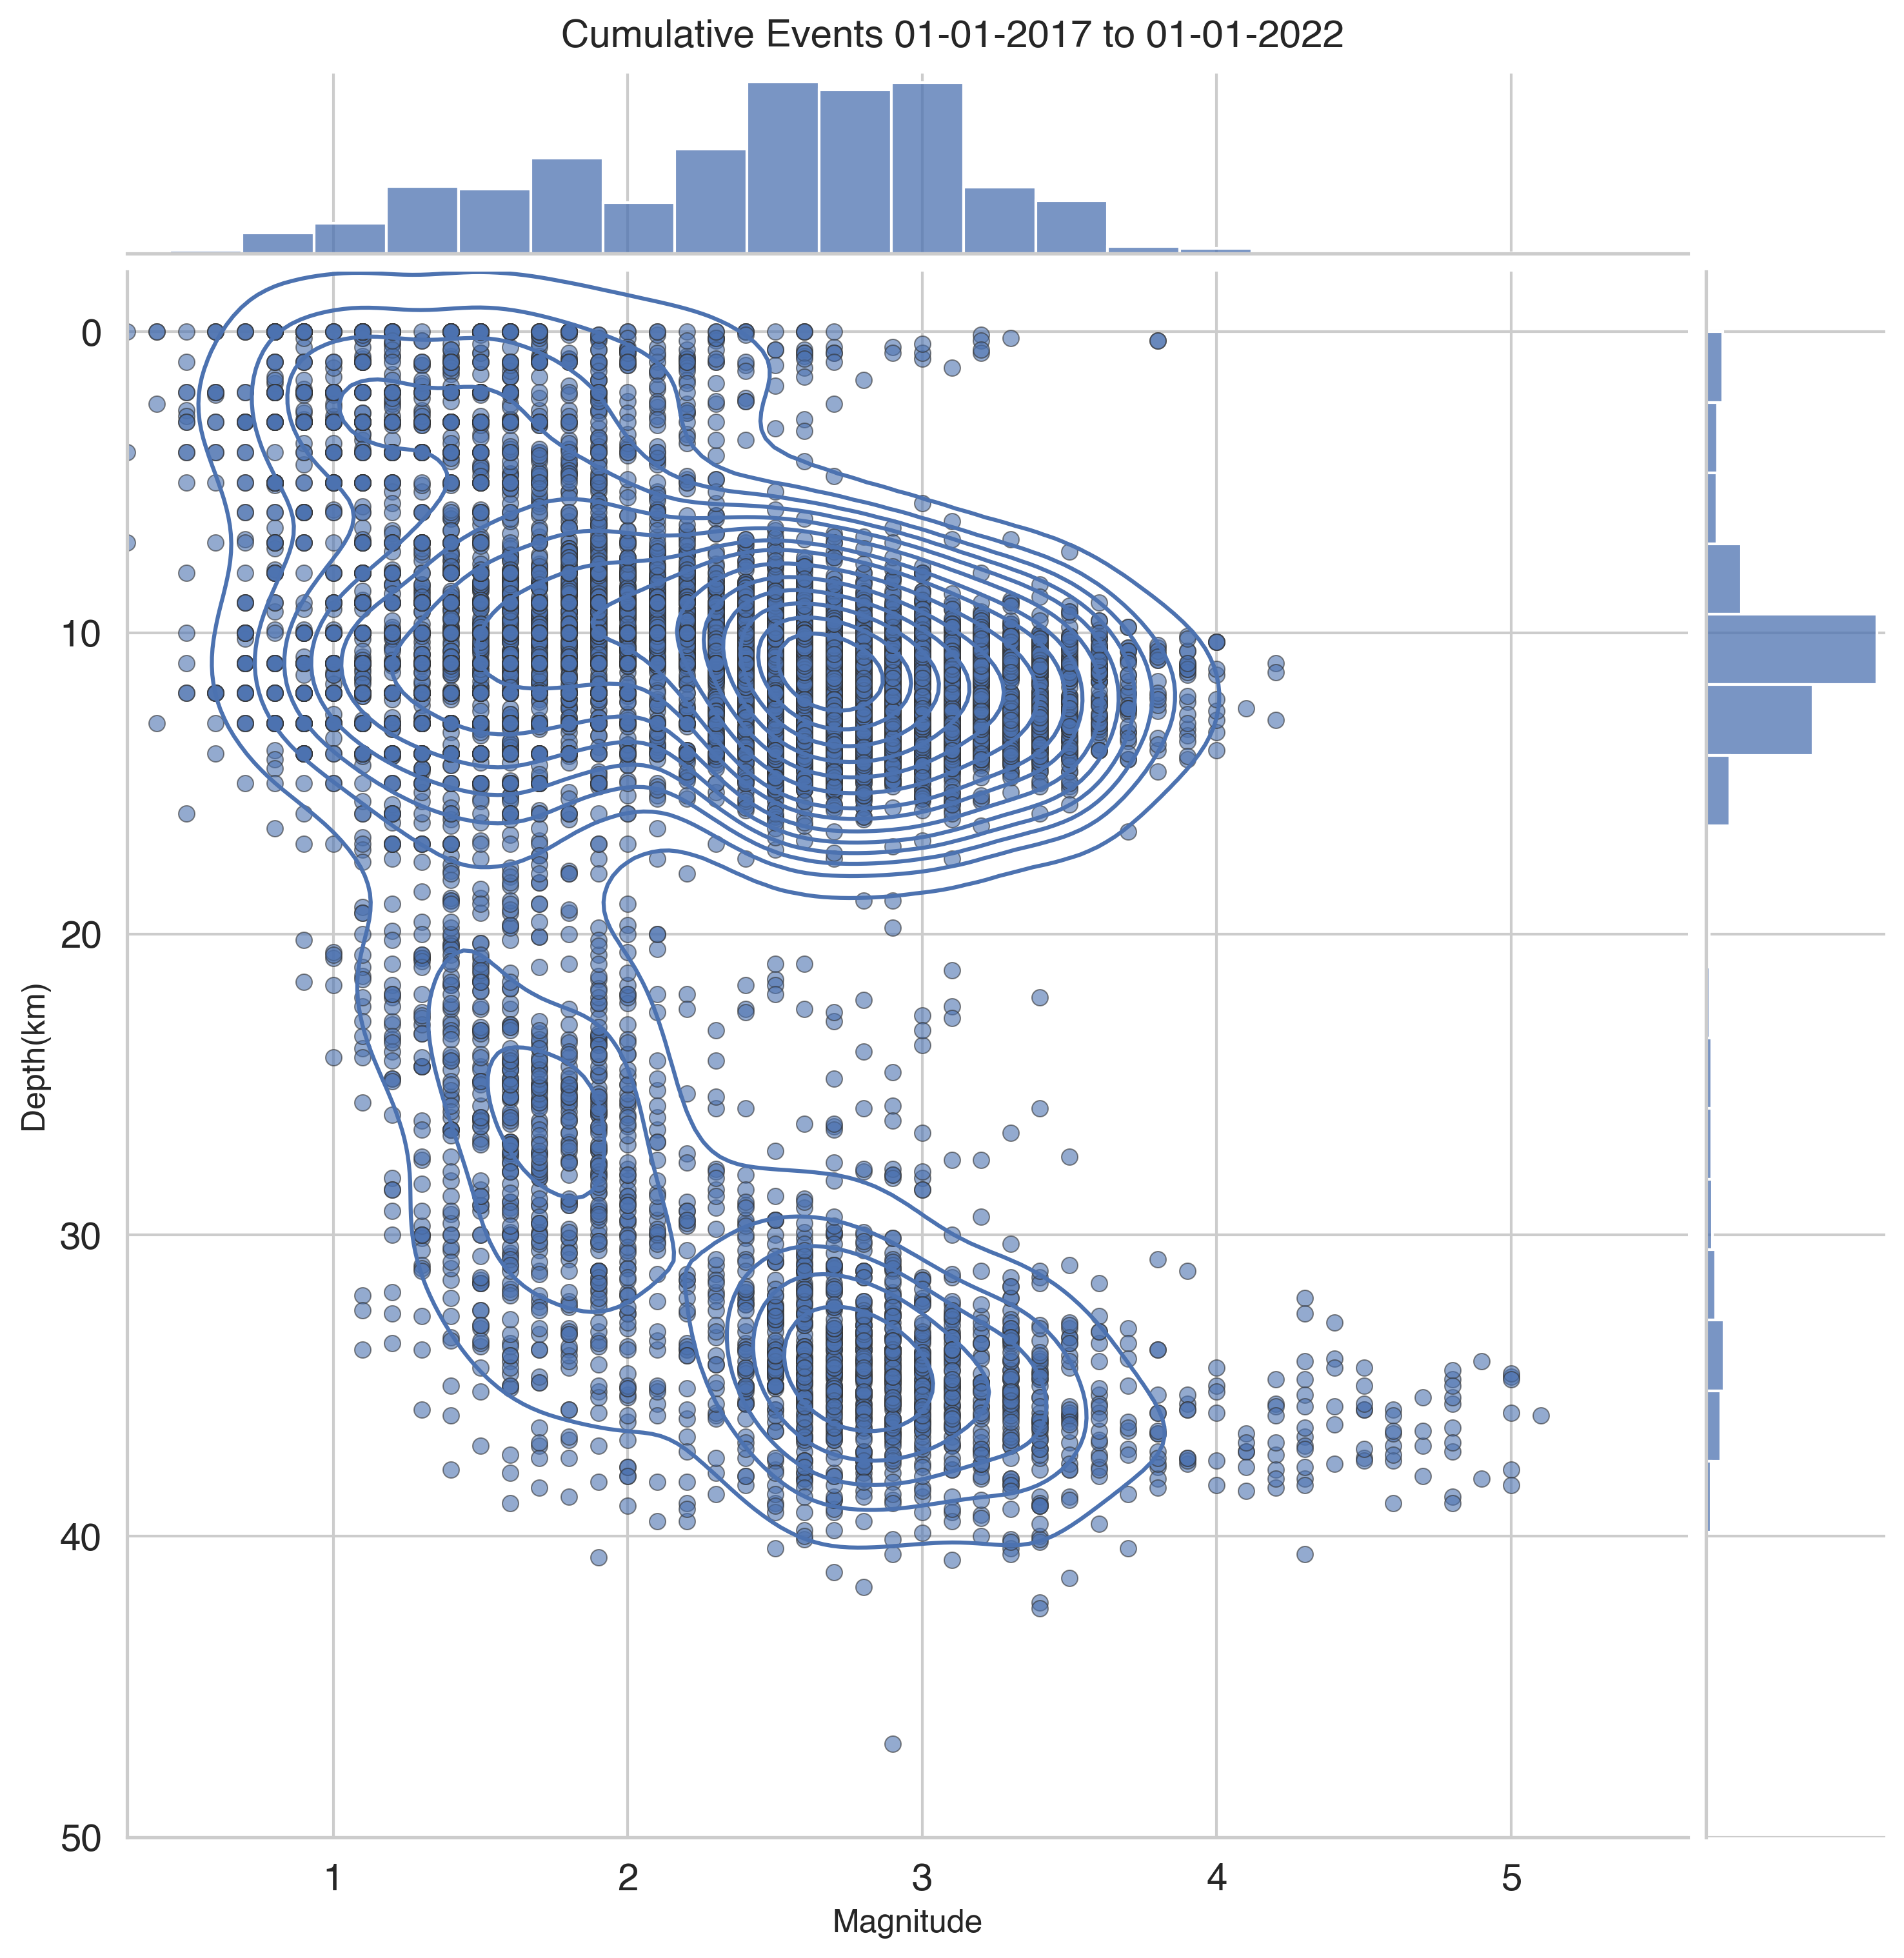

In [8]:
cumulative_events_mag_depth(df_ign, hue=None)
plt.suptitle('Cumulative Events 01-01-2017 to 01-01-2022', y=1.01);

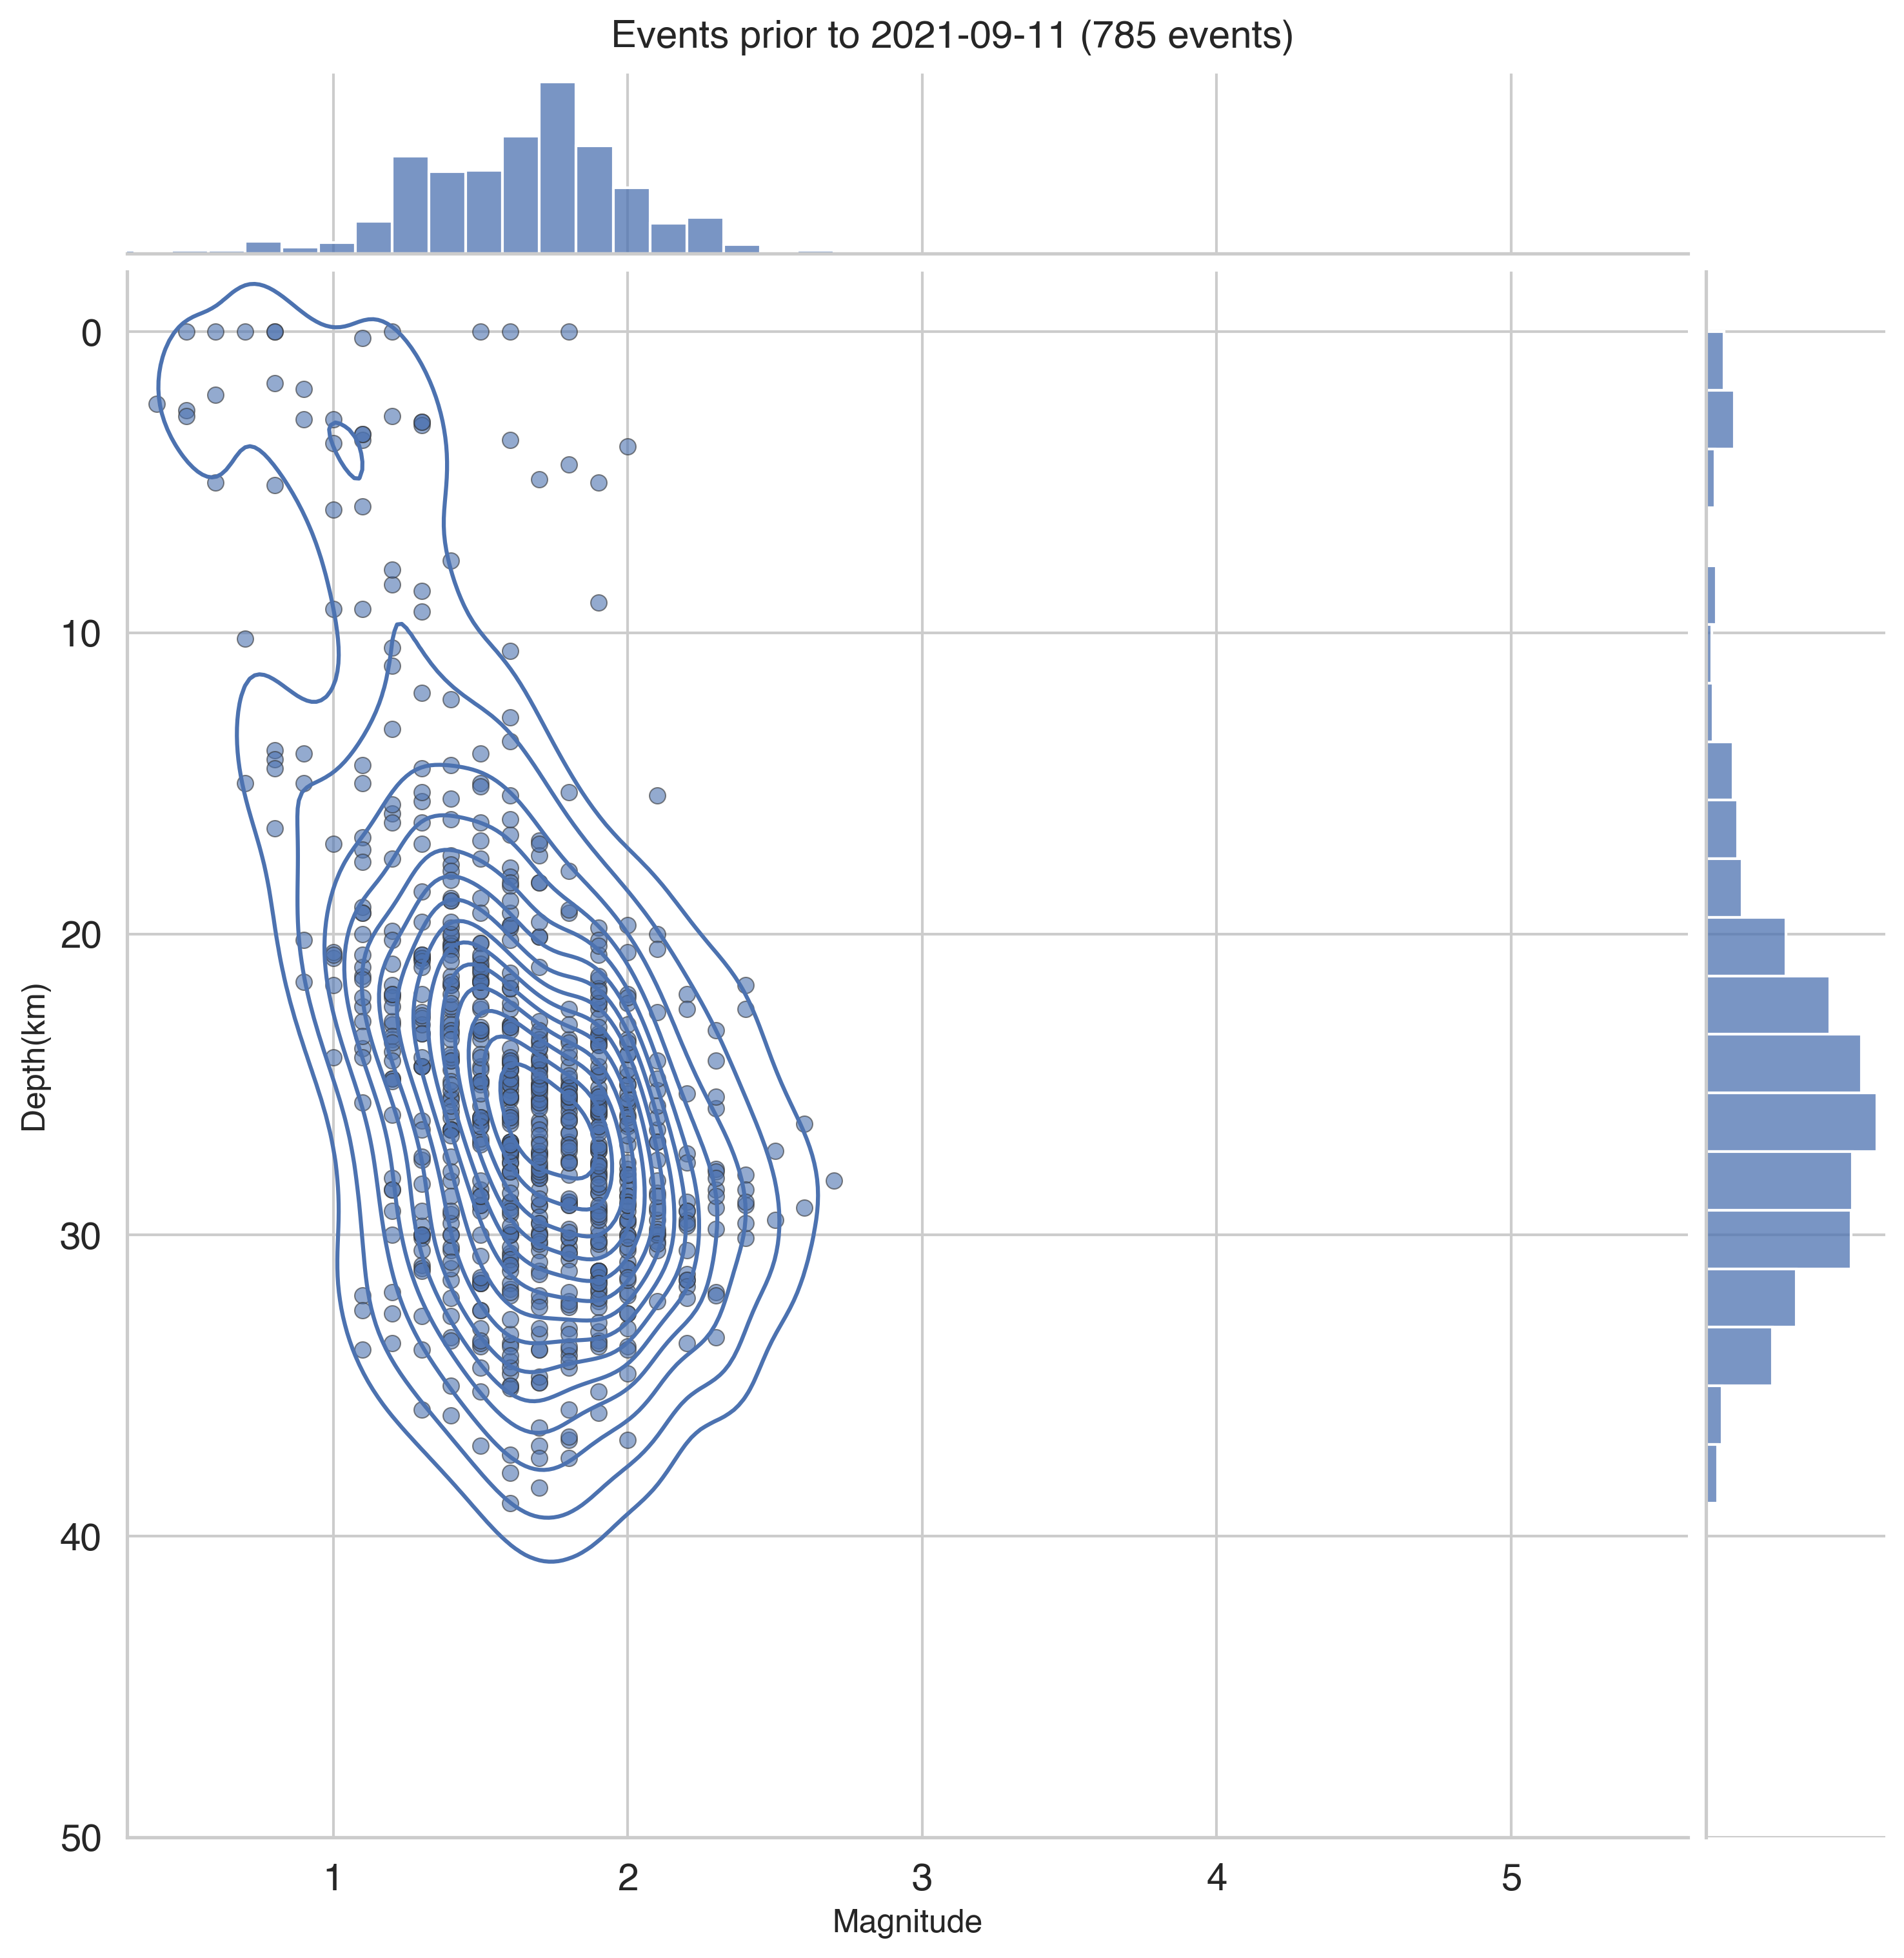

In [9]:
cumulative_events_mag_depth(df_ign_early, hue=None)
plt.suptitle(f'Events prior to 2021-09-11 ({len(df_ign_early.index)} events)', y=1.01);

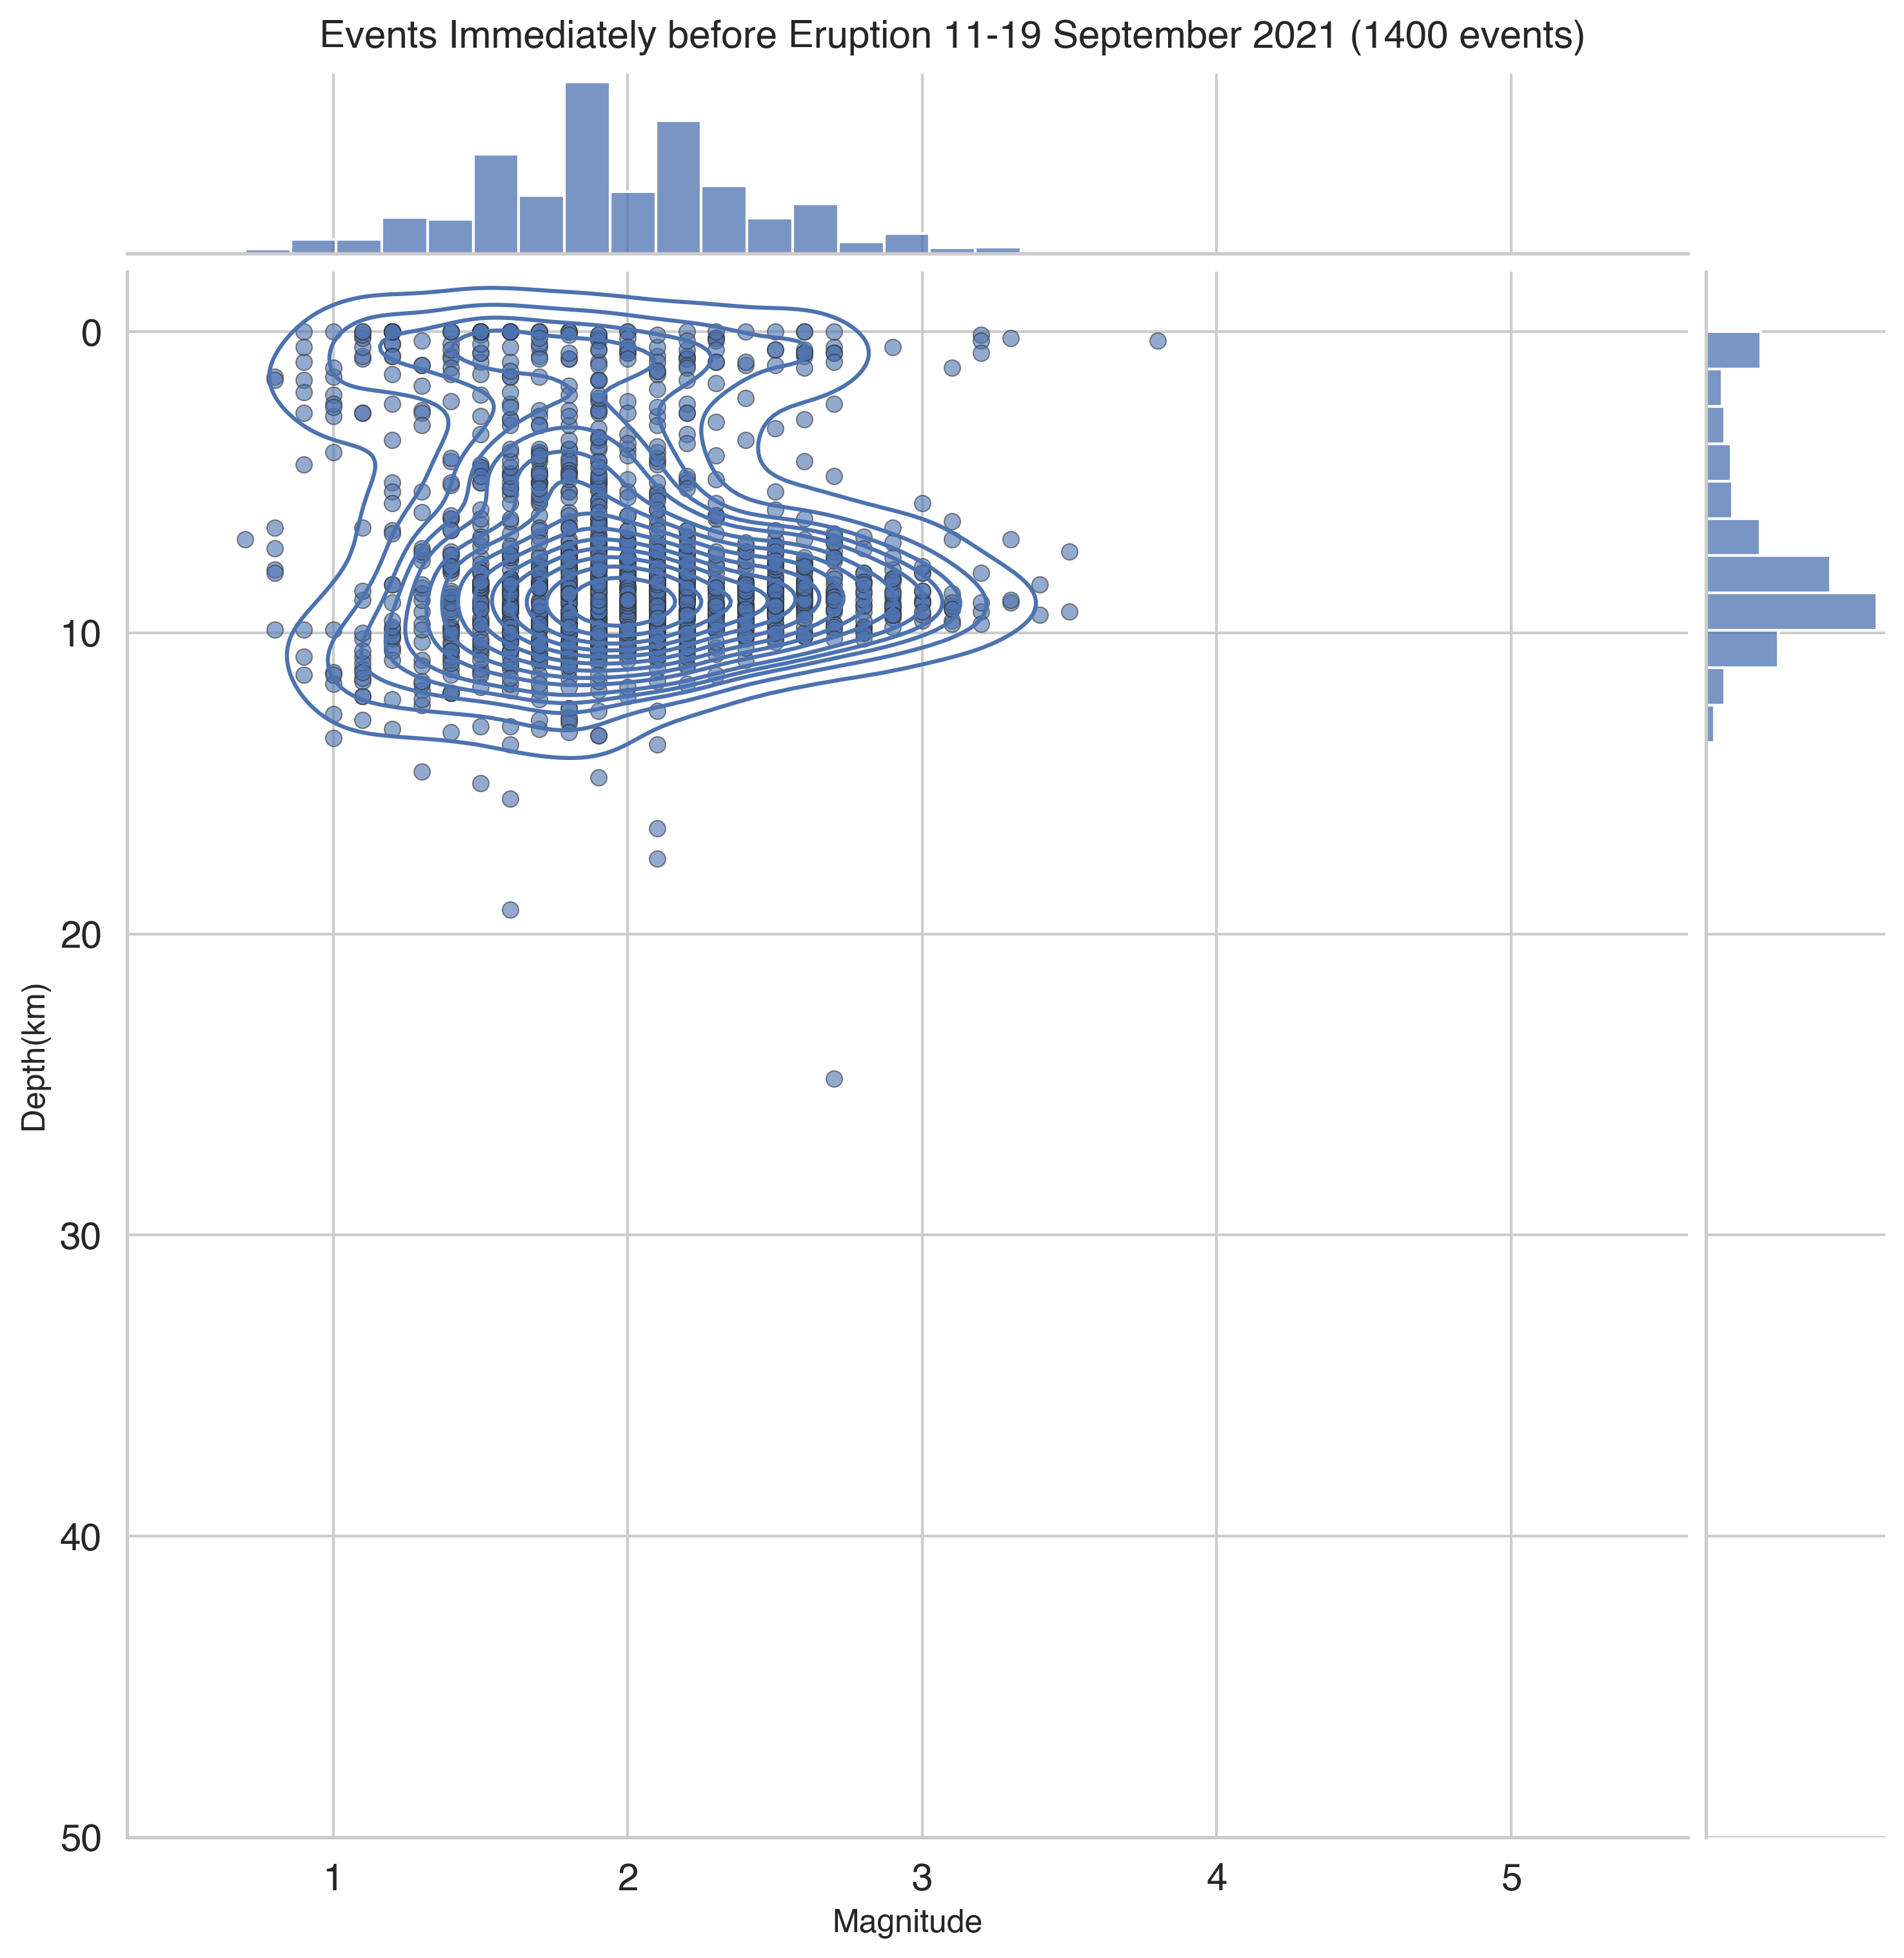

In [10]:
cumulative_events_mag_depth(df_ign_pre, hue=None)
plt.suptitle(f"Events Immediately before Eruption 11-19 September 2021 ({len(df_ign_pre.index)} events)", y=1.01);

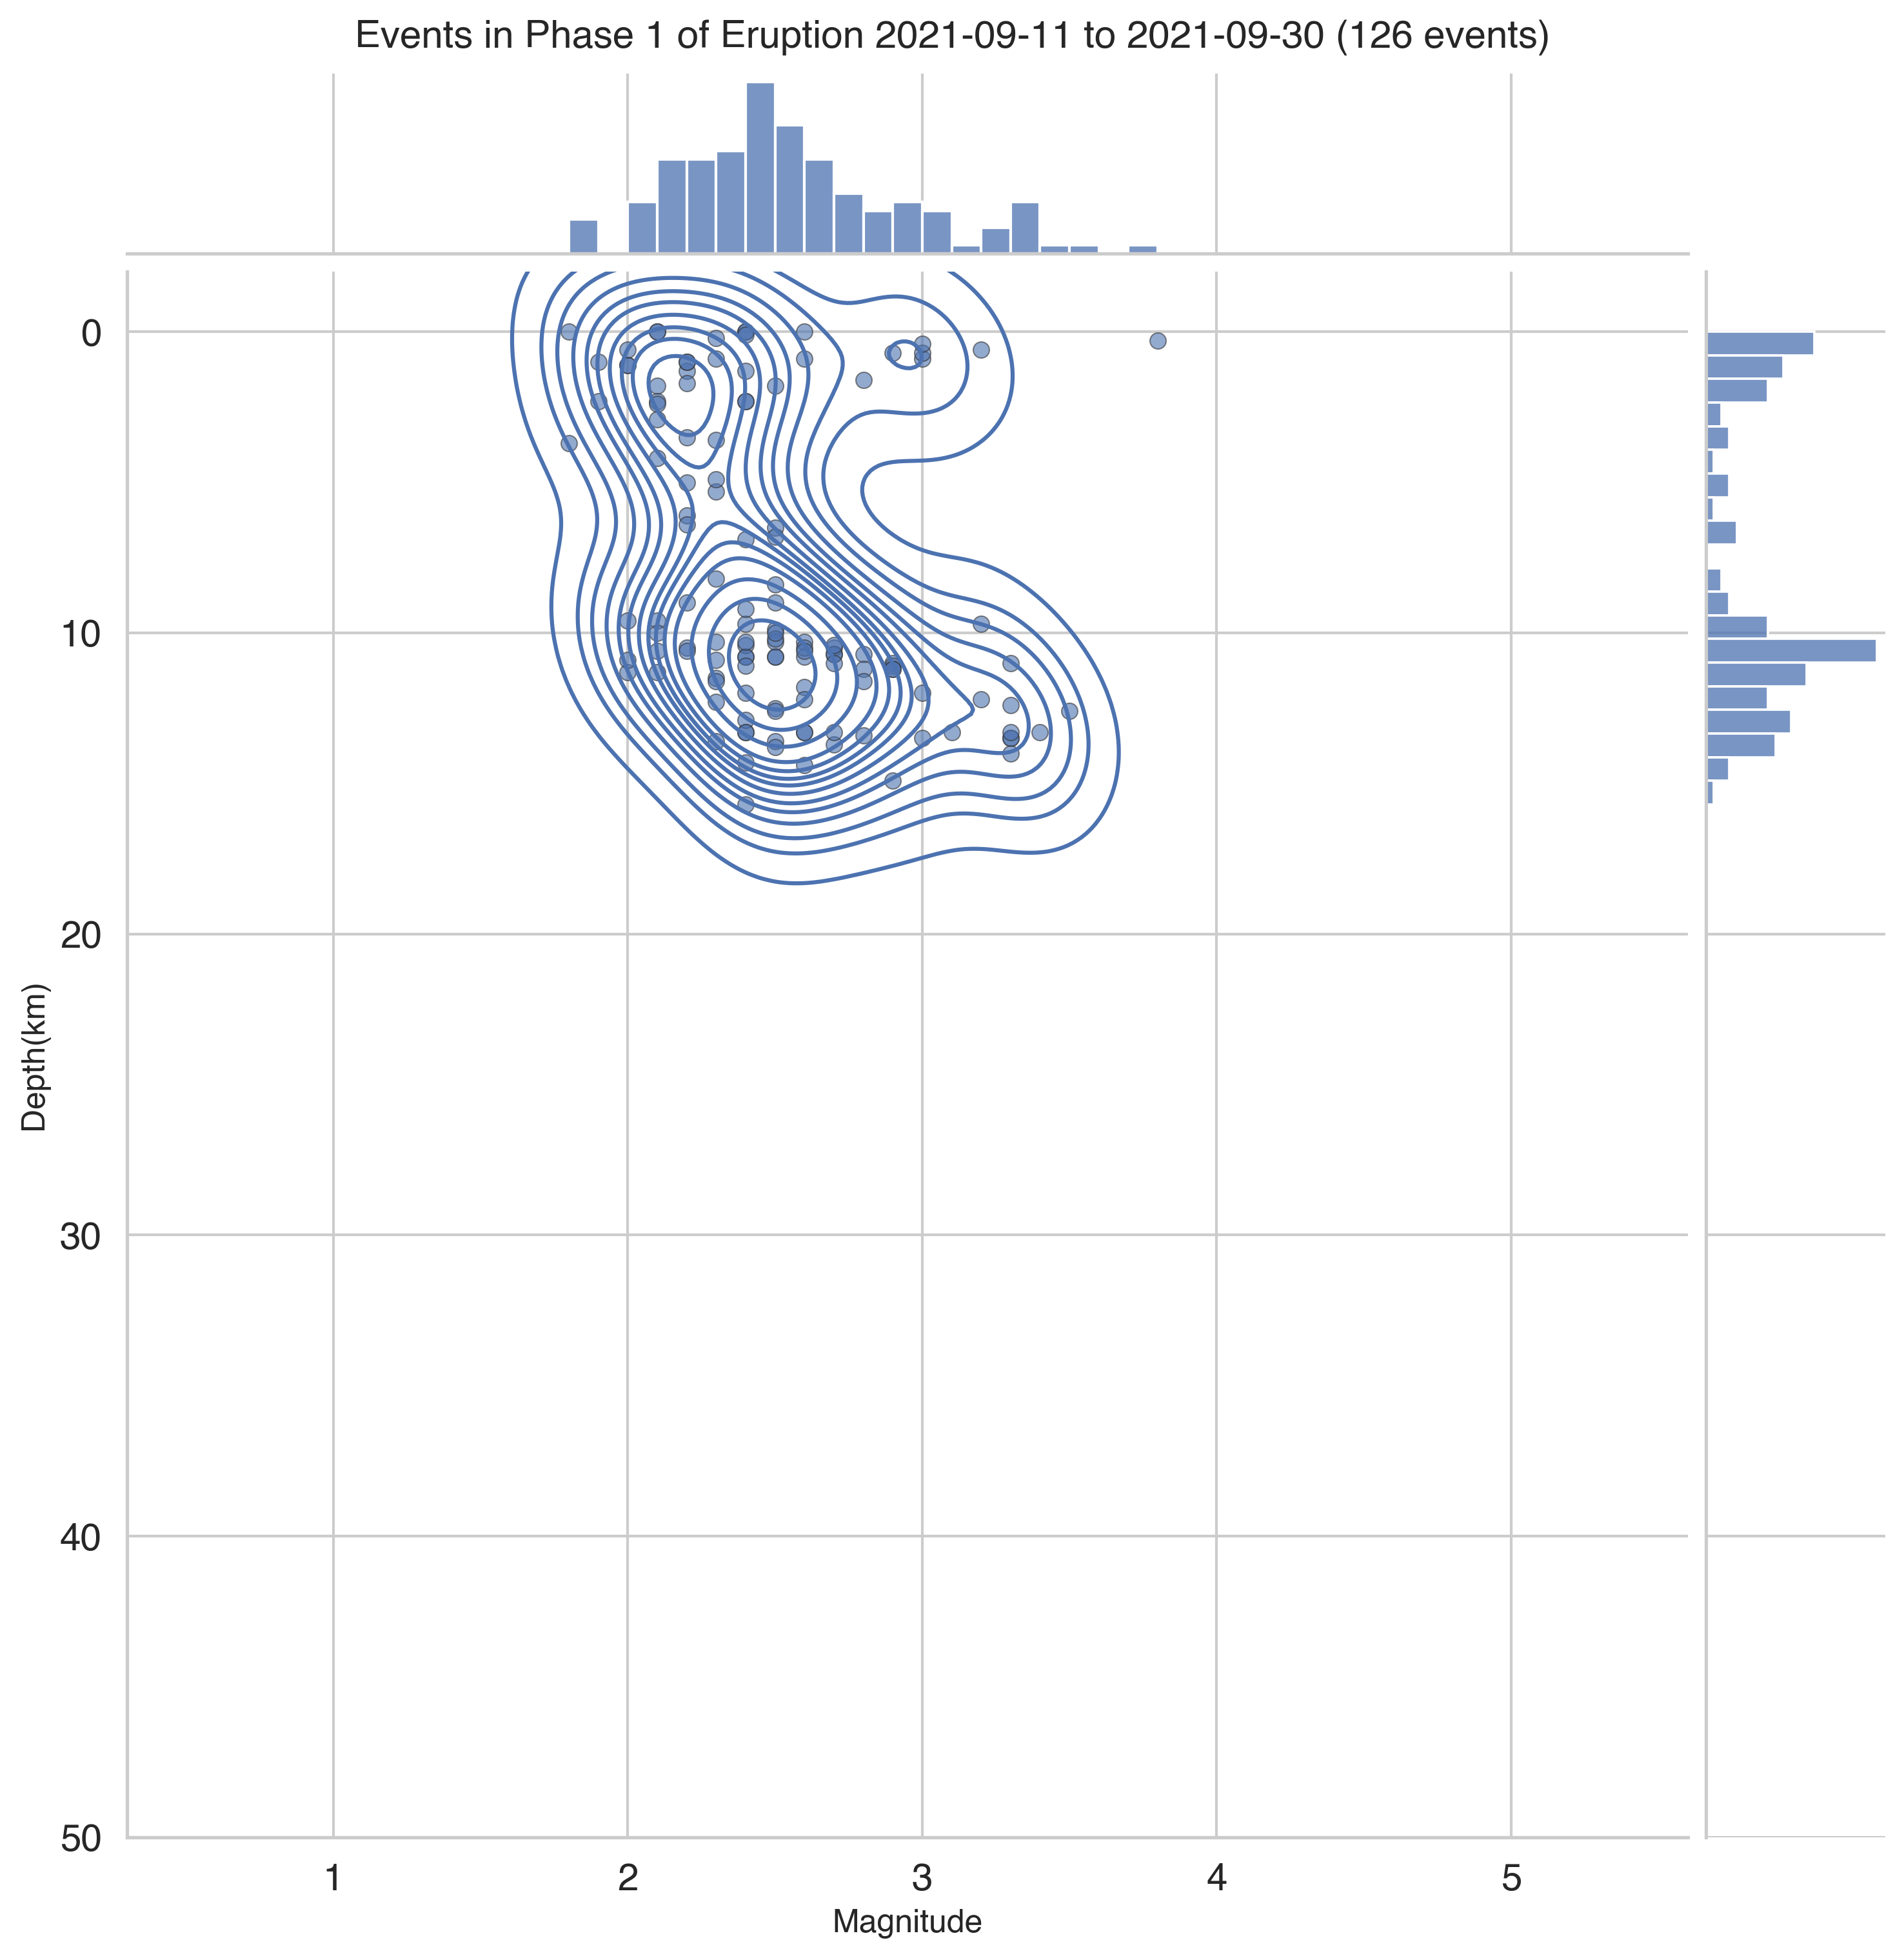

In [11]:
cumulative_events_mag_depth(df_ign_phase1, hue=None)
plt.suptitle(f"Events in Phase 1 of Eruption 2021-09-11 to 2021-09-30 ({len(df_ign_phase1.index)} events)", y=1.01);

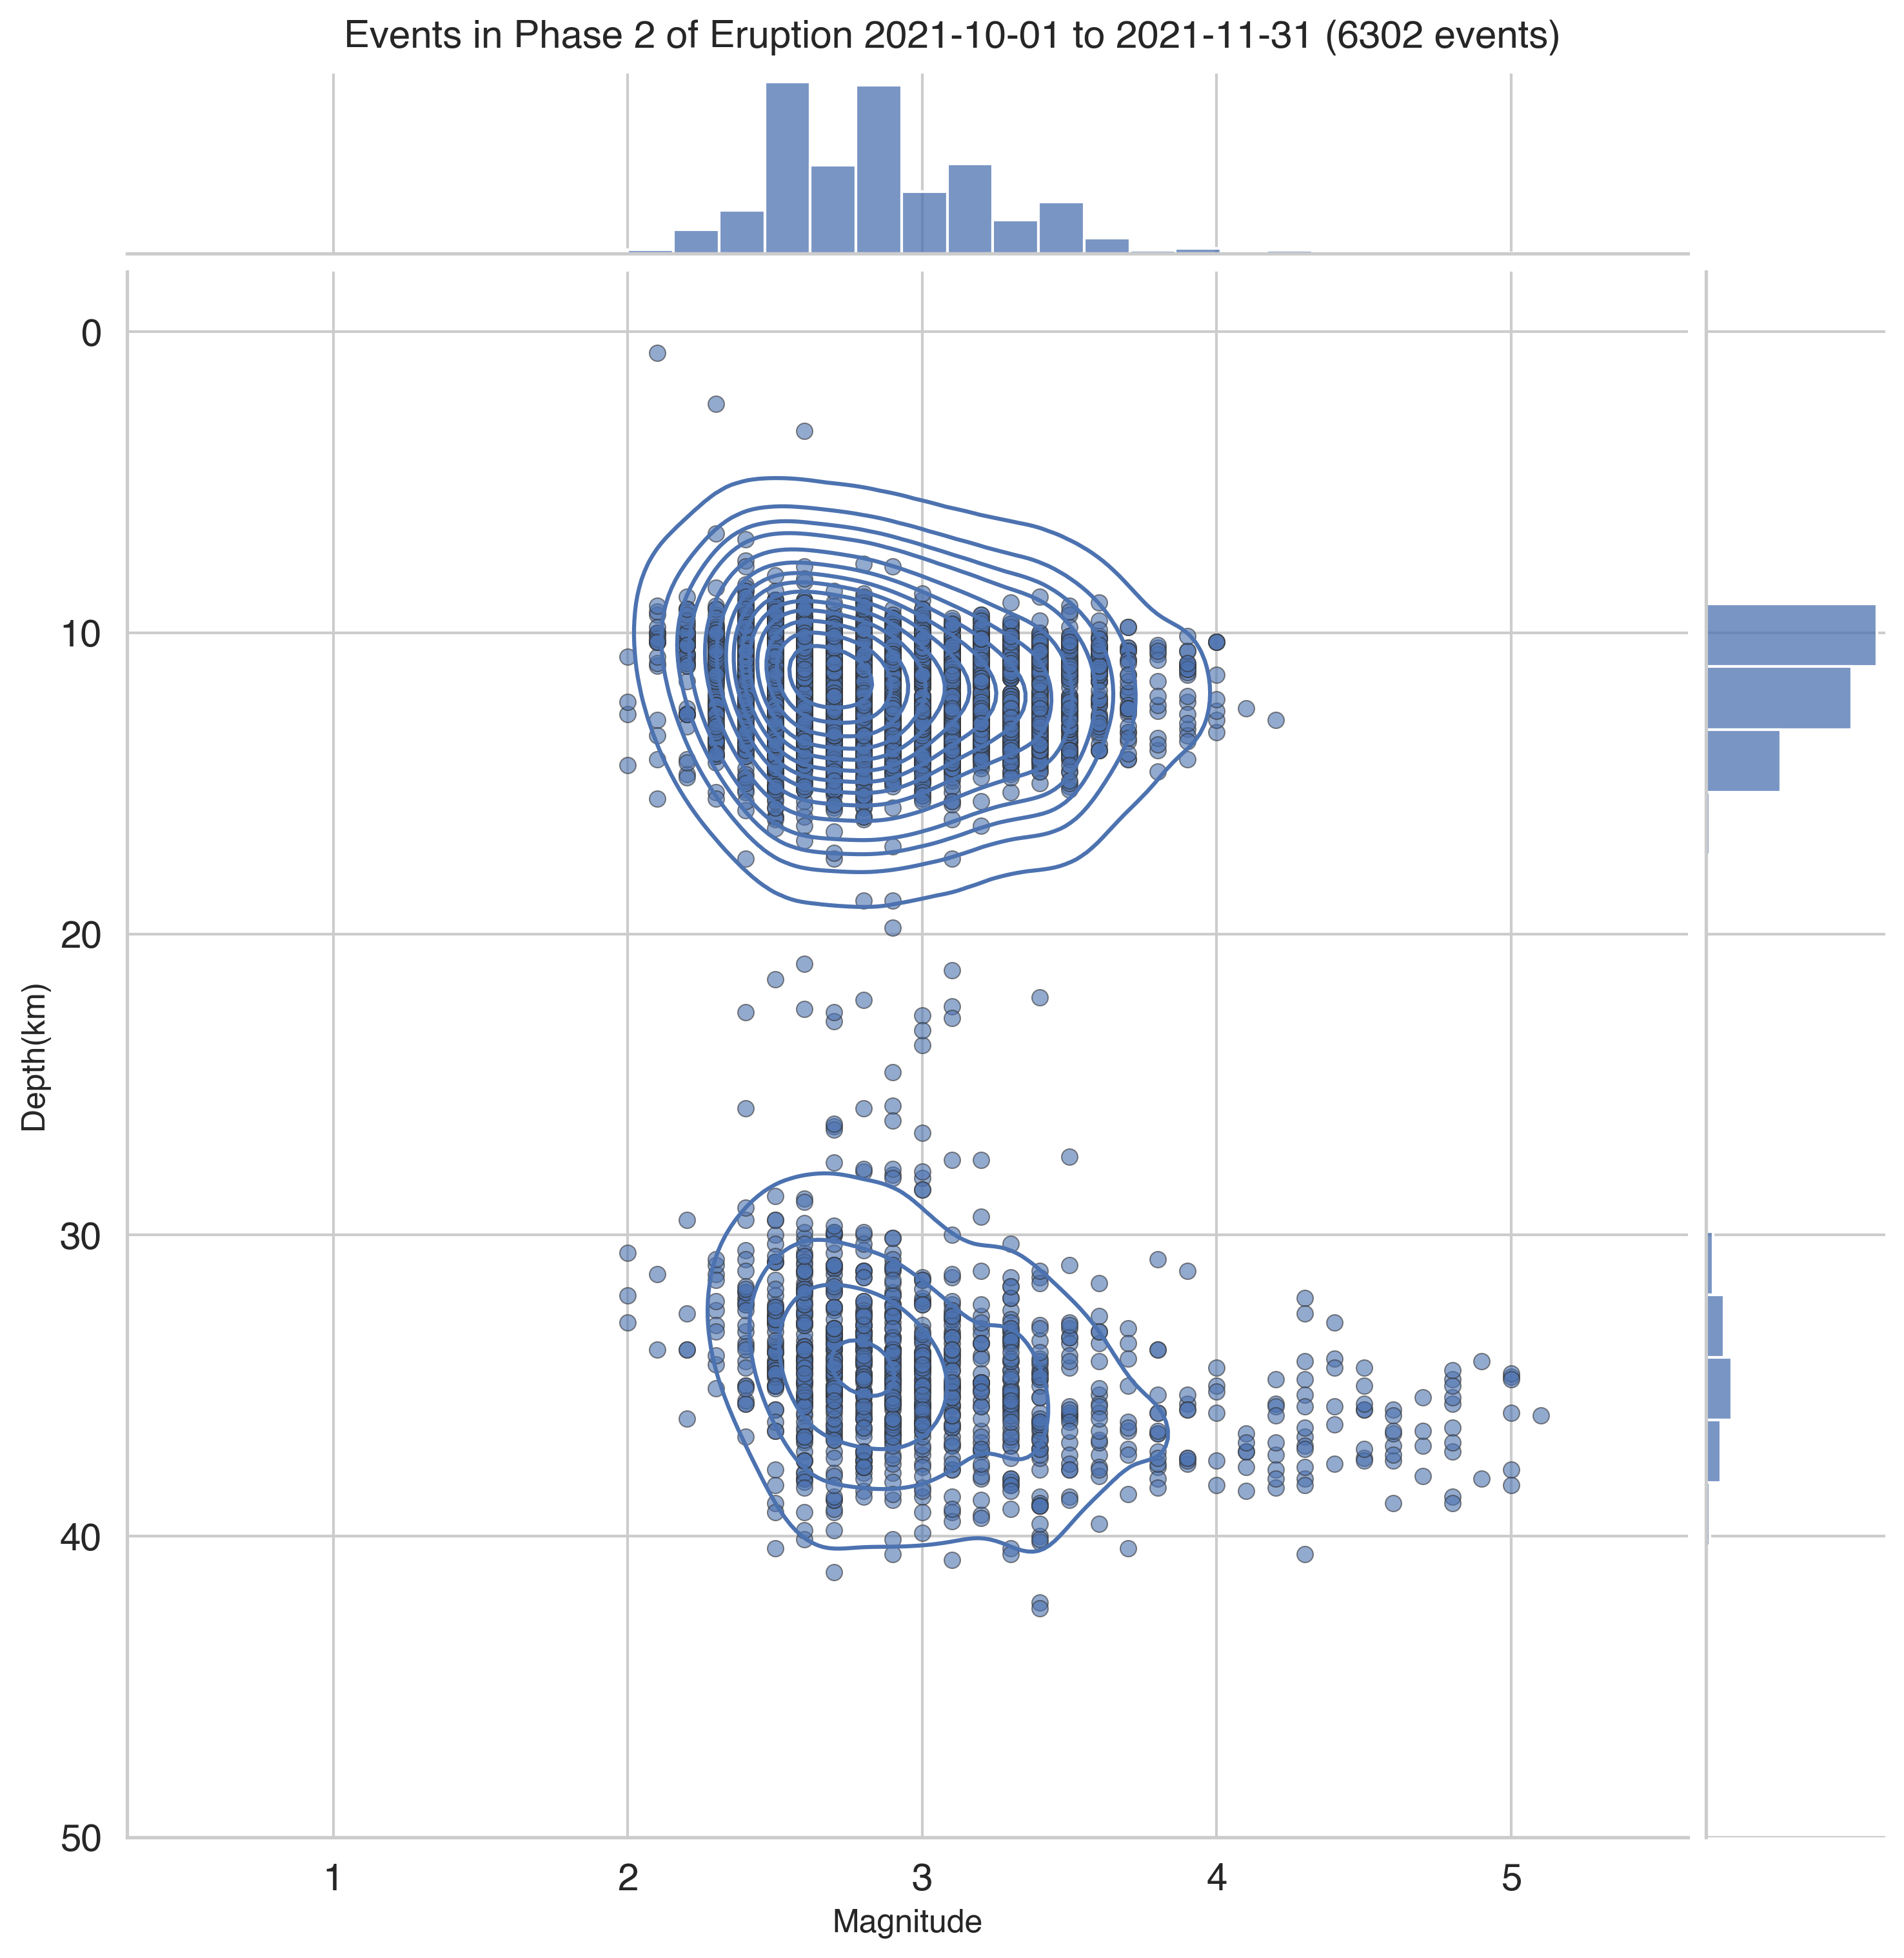

In [12]:
cumulative_events_mag_depth(df_ign_phase2, hue=None)
plt.suptitle(f"Events in Phase 2 of Eruption 2021-10-01 to 2021-11-31 ({len(df_ign_phase2.index)} events)", y=1.01);

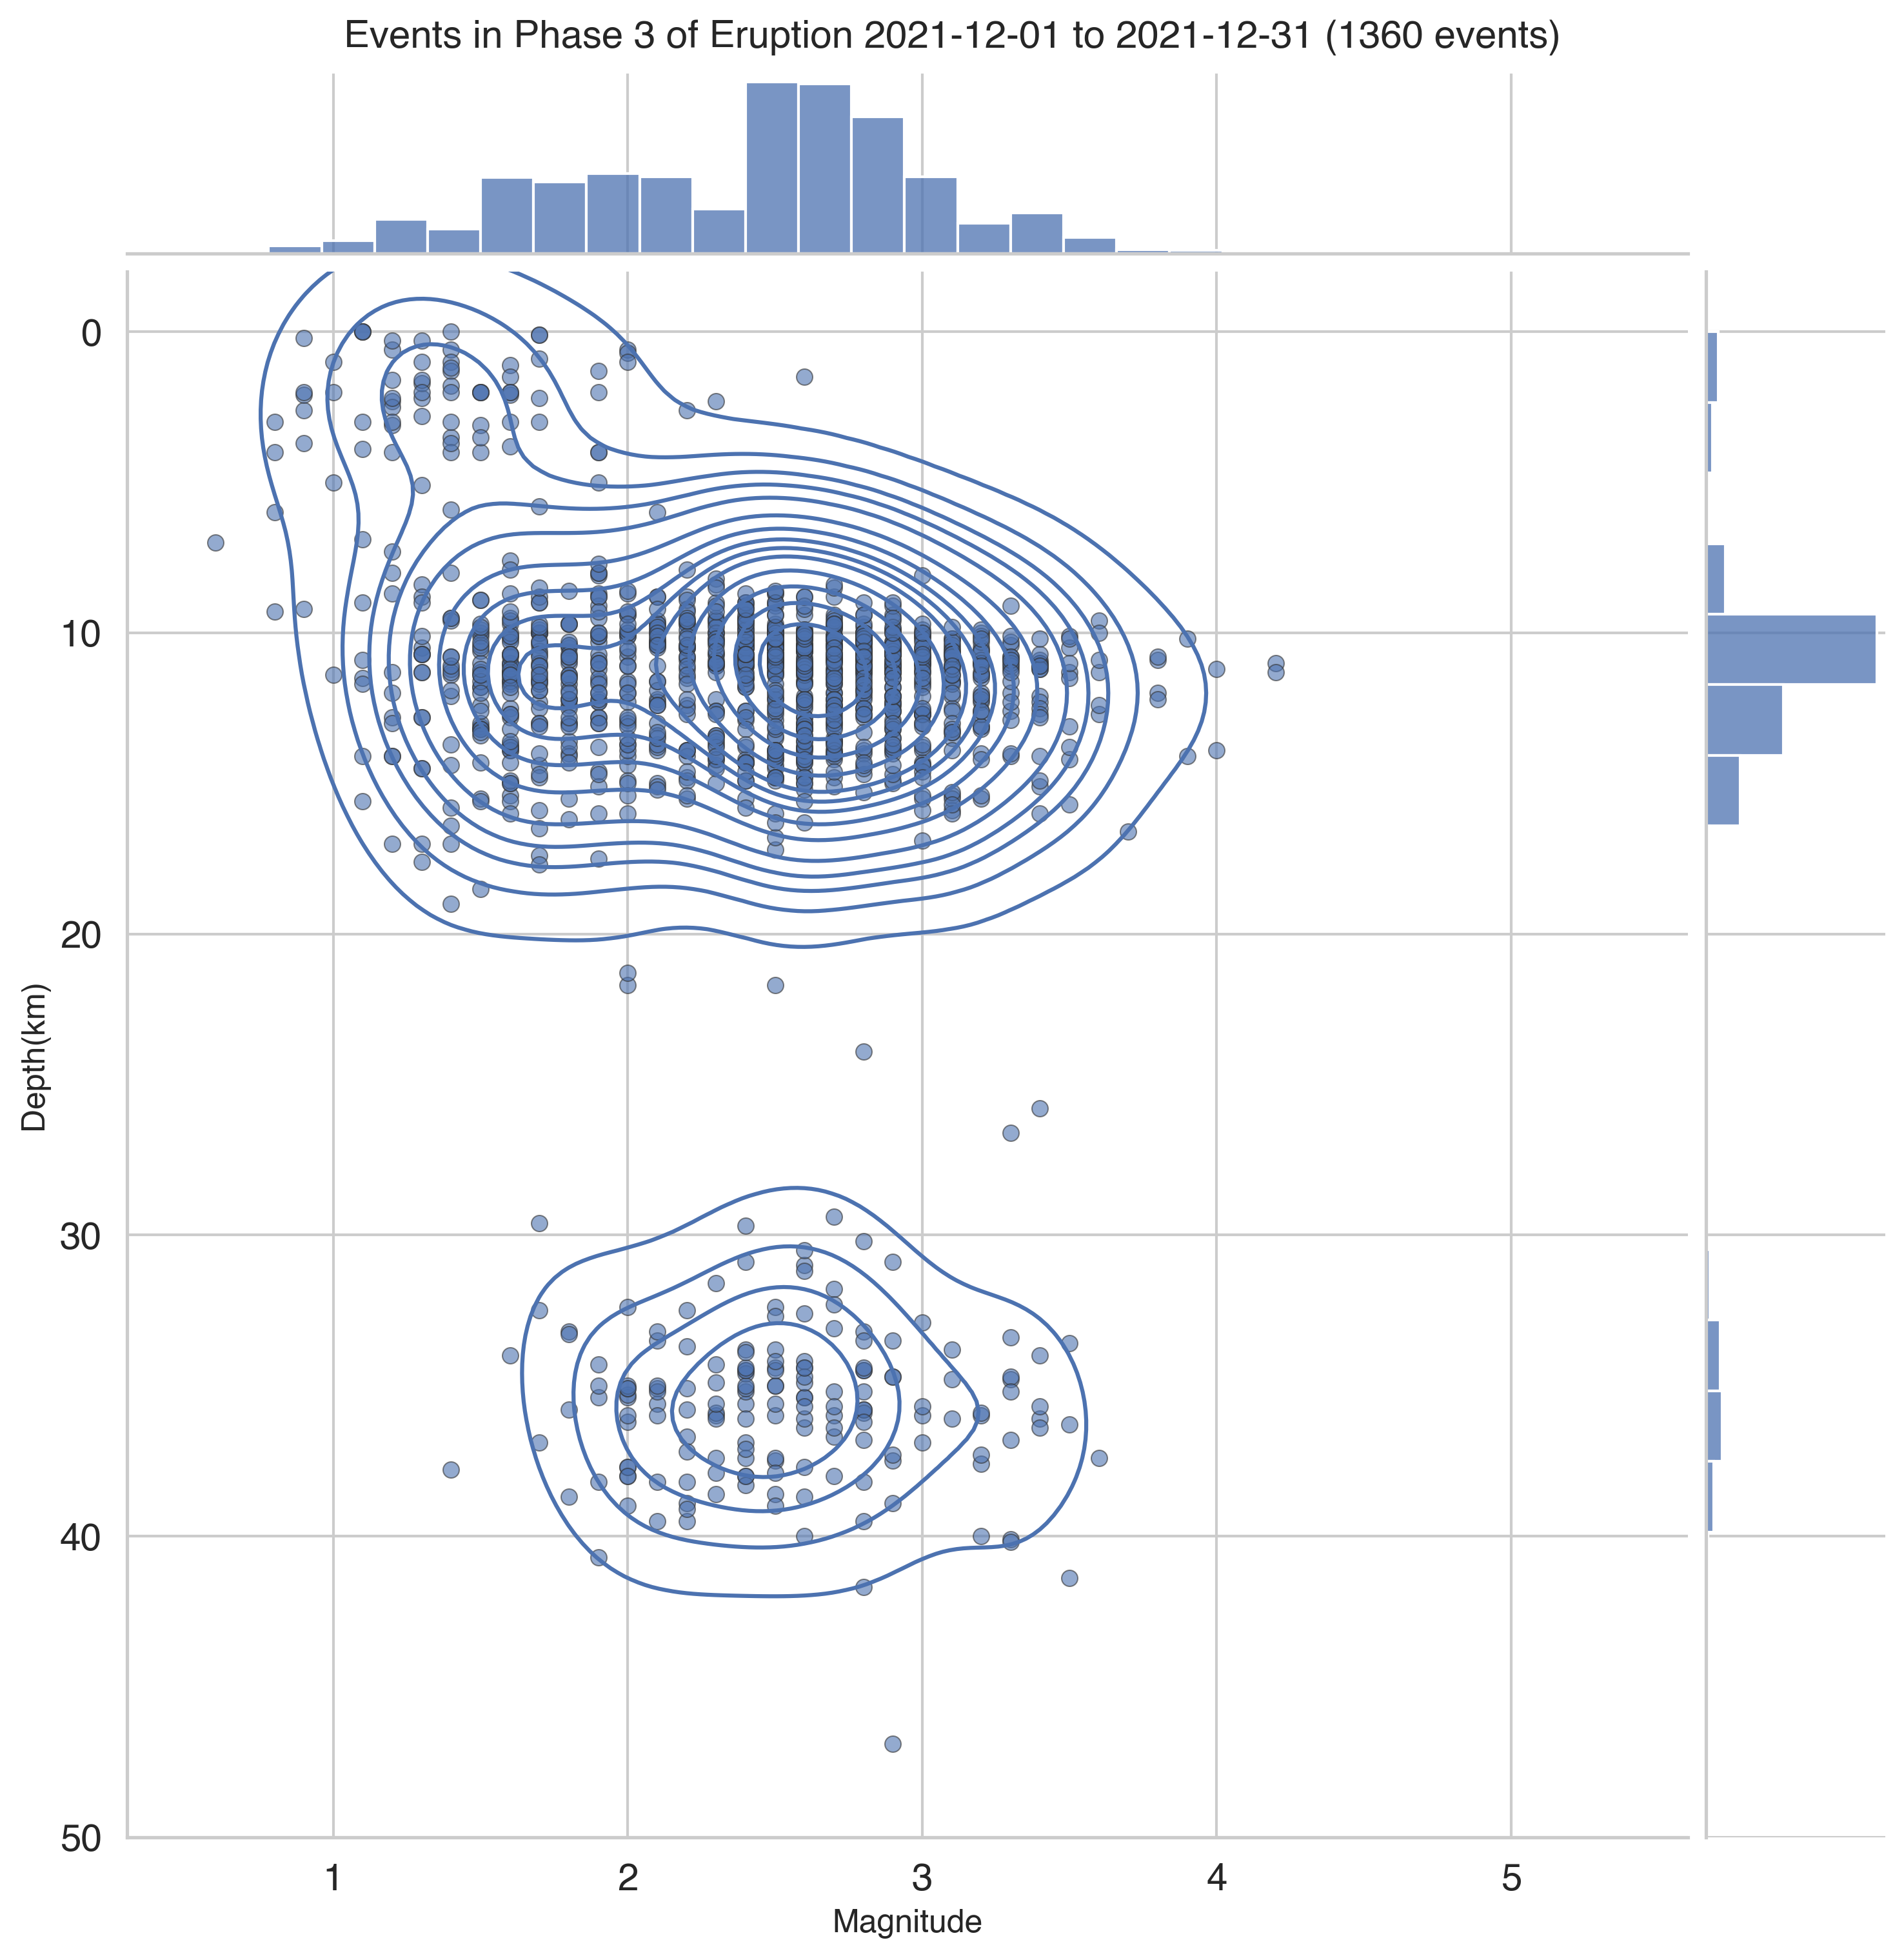

In [13]:
cumulative_events_mag_depth(df_ign_phase3, hue=None)
plt.suptitle(f"Events in Phase 3 of Eruption 2021-12-01 to 2021-12-31 ({len(df_ign_phase3.index)} events)", y=1.01);